# Assignment - 2

### CS22B1093 Rohan G

--------------------

### Importing necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

QSocketNotifier: Can only be used with threads started with QThread


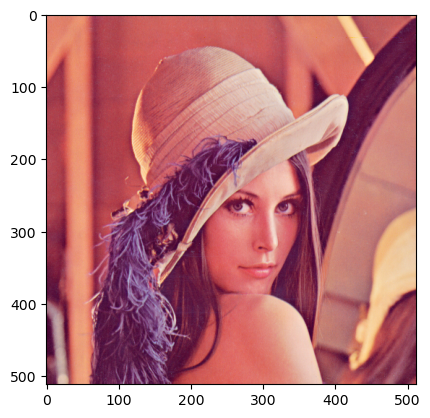

In [2]:
fc = cv2.imread("Lena.png")
cv2.imshow("Lena Image", fc)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(fc, cv2.COLOR_BGR2RGB))

### Converting fc to grayscale fg

The difference between the built-in and manual functions : 
 [[ 0  0  2 ...  4  2  1]
 [ 0  0  2 ...  4  2  1]
 [ 0  0  2 ...  4  2  1]
 ...
 [11 11  9 ...  6  5  8]
 [ 9  9  8 ...  5  6  5]
 [ 9  9  8 ...  5  6  5]]


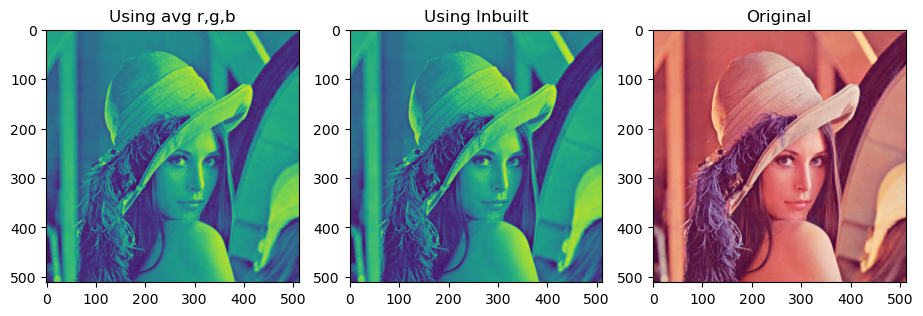

In [3]:
fg_avg = np.mean(fc, axis=2).astype(np.uint8) # using r,g,b values
fg = cv2.cvtColor(fc, cv2.COLOR_BGR2GRAY) # using inbuilt function

plt.figure(figsize=[15,5])
plt.subplot(141); plt.imshow(fg_avg); plt.title("Using avg r,g,b")
plt.subplot(142); plt.imshow(fg); plt.title("Using Inbuilt")
plt.subplot(143); plt.imshow(cv2.cvtColor(fc, cv2.COLOR_BGR2RGB)); plt.title("Original")

diff = cv2.absdiff(fg_avg, fg)
print("The difference between the built-in and manual functions : \n" ,diff)

# there is difference between the images as cv2 uses weighted average
# cv2.Grayscale Value = 0.299 * R + 0.587 * G + 0.114 * B

# though it feels like no difference by just looking by eyes

### Resizing fg using Nearest Neighbour Interpolation

The difference between the built-in and manual functions : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


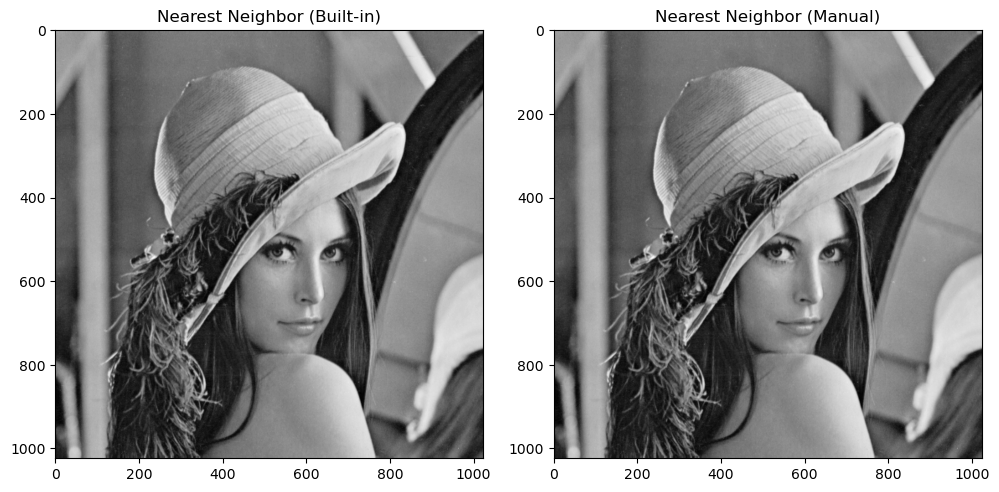

In [4]:
scale_factor = 2

fg_nearest_builtin = cv2.resize(fg, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)

def nearest_neighbor_interpolation(image, scale_factor):
    h, w = image.shape
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    resized_image = np.zeros((new_h, new_w), dtype=image.dtype)
    
    for i in range(new_h):
        for j in range(new_w):
            x = int(i / scale_factor)
            y = int(j / scale_factor)
            resized_image[i, j] = image[x, y]
    
    return resized_image

fg_nearest_manual = nearest_neighbor_interpolation(fg, scale_factor)

diff = cv2.absdiff(fg_nearest_builtin, fg_nearest_manual)
print("The difference between the built-in and manual functions : \n" ,diff)

plt.figure(figsize=[15, 10])
plt.subplot(231); plt.imshow(fg_nearest_builtin, cmap='gray'); plt.title("Nearest Neighbor (Built-in)")
plt.subplot(232); plt.imshow(fg_nearest_manual, cmap='gray'); plt.title("Nearest Neighbor (Manual)")
plt.tight_layout()
plt.show()



### Resizing fg using Bi-linear Interpolation

The difference between the built-in and manual functions : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


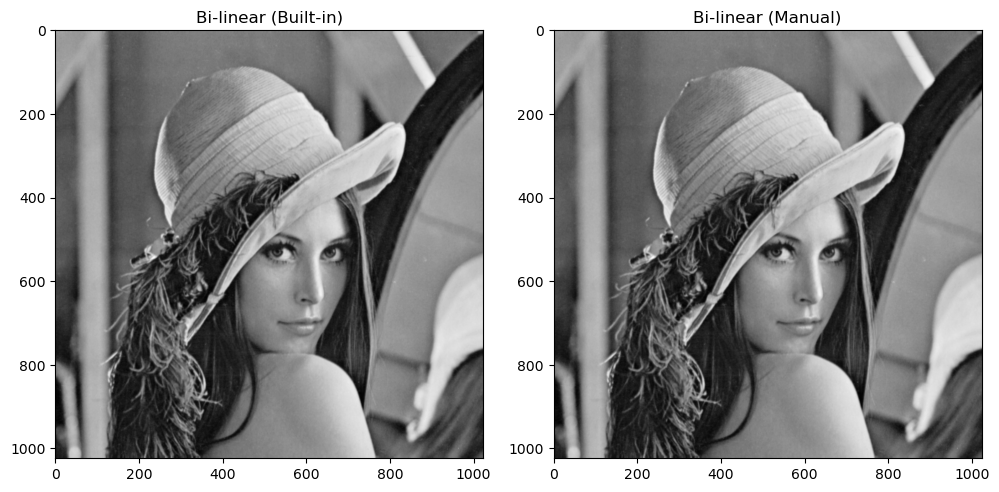

In [5]:
fg_bilinear_builtin = cv2.resize(fg, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

def bilinear_interpolation(image, scale_factor):
    h, w = image.shape
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    resized_image = np.zeros((new_h, new_w), dtype=image.dtype)
    
    for i in range(new_h):
        for j in range(new_w):
            x = (i + 0.5) / scale_factor - 0.5
            y = (j + 0.5) / scale_factor - 0.5
            
            x = max(0, min(x, h - 1))
            y = max(0, min(y, w - 1))
            
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, h - 1), min(y1 + 1, w - 1)
            
            dx, dy = x - x1, y - y1
            
            value = (1 - dx) * (1 - dy) * image[x1, y1] + \
                    dx * (1 - dy) * image[x2, y1] + \
                    (1 - dx) * dy * image[x1, y2] + \
                    dx * dy * image[x2, y2]
            
            resized_image[i, j] = int(round(value))
    
    return resized_image.astype(np.uint8)

fg_bilinear_manual = bilinear_interpolation(fg, scale_factor)

diff = cv2.absdiff(fg_bilinear_builtin, fg_bilinear_manual)
print("The difference between the built-in and manual functions : \n" ,diff)

plt.figure(figsize=[15, 10])
plt.subplot(231); plt.imshow(fg_bilinear_builtin, cmap='gray'); plt.title("Bi-linear (Built-in)")
plt.subplot(232); plt.imshow(fg_bilinear_manual, cmap='gray'); plt.title("Bi-linear (Manual)")

plt.tight_layout()
plt.show()

### Resizing fg using Bi-Cubic Interpolation

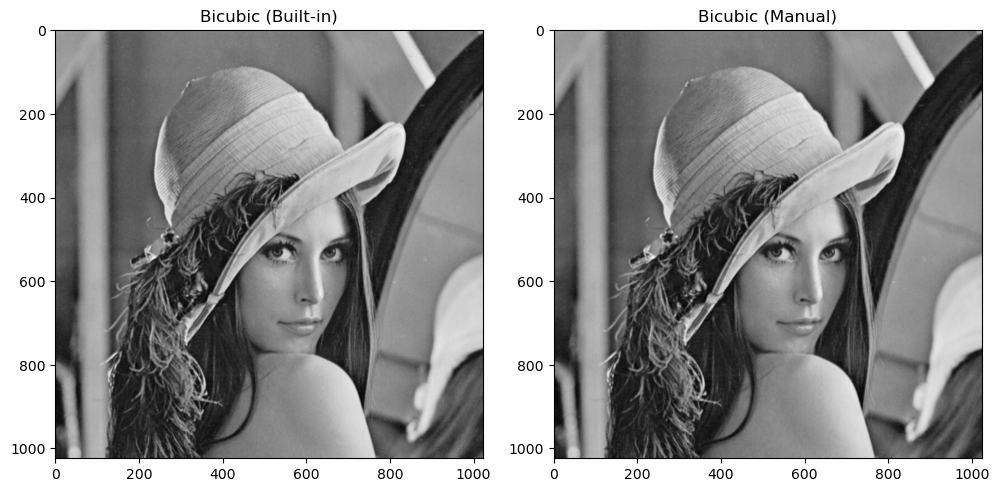

In [6]:
scale_factor = 2

fg_bicubic_builtin = cv2.resize(fg, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

def bicubic_interpolation(image, scale_factor):
    def cubic_weight(x):
        a = -0.5  # Commonly used value for bicubic interpolation
        x = np.abs(x)
        if x <= 1:
            return (a + 2) * x**3 - (a + 3) * x**2 + 1
        elif x < 2:
            return a * x**3 - 5 * a * x**2 + 8 * a * x - 4 * a
        else:
            return 0

    h, w = image.shape
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    resized_image = np.zeros((new_h, new_w), dtype=image.dtype)

    for i in range(new_h):
        for j in range(new_w):
            x = (i + 0.5) / scale_factor - 0.5
            y = (j + 0.5) / scale_factor - 0.5

            x0 = int(np.floor(x)) - 1
            y0 = int(np.floor(y)) - 1

            value = 0

            for m in range(4):
                for n in range(4):
                    dx = cubic_weight(x - (x0 + m))
                    dy = cubic_weight(y - (y0 + n))

                    x_coord = max(0, min(x0 + m, h - 1))
                    y_coord = max(0, min(y0 + n, w - 1))

                    value += image[x_coord, y_coord] * dx * dy

            resized_image[i, j] = np.clip(value, 0, 255)
            resized_image[i, j] = np.uint8(np.round(value))

    return resized_image

fg_bicubic_manual = bicubic_interpolation(fg, scale_factor)

plt.figure(figsize=[15, 5])
plt.subplot(131); plt.imshow(fg_bicubic_builtin, cmap='gray'); plt.title("Bicubic (Built-in)")
plt.subplot(132); plt.imshow(fg_bicubic_manual, cmap='gray'); plt.title("Bicubic (Manual)")

plt.tight_layout()
plt.show()

----------------------------